# Q1) Neural Network To Learn Boolean Functions

## (a) Function defined to take a 3-variable boolean function as input

In [46]:
def makeBool():
    print("Enter the output for 3-variable Boolean function:")
    print("Use 0 for False and 1 for True.")
    truth_table = {}
    for a in range(2):
        for b in range(2):
            for c in range(2):
                while True:
                    try:
                        output = int(input(f"f({a}, {b}, {c}) = "))
                        if output not in [0, 1]:
                            raise ValueError
                        truth_table[(a, b, c)] = output
                        break
                    except ValueError:
                        print("Invalid input. Enter 0 or 1.")
    return truth_table

In [47]:
bool_func = makeBool()

Enter the output for 3-variable Boolean function:
Use 0 for False and 1 for True.


f(0, 0, 0) =  1
f(0, 0, 1) =  0
f(0, 1, 0) =  0
f(0, 1, 1) =  0
f(1, 0, 0) =  1
f(1, 0, 1) =  1
f(1, 1, 0) =  0
f(1, 1, 1) =  1


## (b) Generating training examples for the Boolean function

In [48]:
def genTrainData(truth_table):
    X_train = []
    Y_train = []
    for inputs, output in truth_table.items():
        X_train.append(list(inputs))  
        Y_train.append(output)        
    return X_train, Y_train

In [49]:
X_train, Y_train = genTrainData(bool_func)

print("X_train:", X_train)
print("Y_train:", Y_train)

X_train: [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
Y_train: [1, 0, 0, 0, 1, 1, 0, 1]


## (c) Training Neural Netwrok to learn Boolean Function

In [50]:
import math
import random
import numpy as np

class NeuralNetwork:
    def __init__(self, inNodes, hidNodes, outNodes):
        self.inNodes = inNodes
        self.hidNodes = hidNodes
        self.outNodes = outNodes
        self.w1 = np.random.rand(self.inNodes, self.hidNodes) - 0.5
        self.w2 = np.random.rand(self.hidNodes, self.outNodes) - 0.5
        self.b1 = np.random.rand(1, self.hidNodes) - 0.5
        self.b2 = np.random.rand(1, self.outNodes) - 0.5

    def forward(self, inputs):
        inputs = np.array(inputs).reshape(1, -1)
        self.h1 = 1 / (1 + np.exp(-(np.dot(inputs, self.w1) + self.b1)))  
        self.y_pred = 1 / (1 + np.exp(-(np.dot(self.h1, self.w2) + self.b2)))  
        return self.y_pred, self.h1

    def train(self, X, y, epochs=10000, learning_rate=0.1): 
        print(f"Training Loss After:")
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        for epoch in range(epochs):
            tot_loss = 0    
            for inputs, target in zip(X, y):
                y_pred, h1 = self.forward(inputs)
                error_output = y_pred - target
                dW2 = np.dot(h1.T, error_output * y_pred * (1 - y_pred))
                db2 = error_output * y_pred * (1 - y_pred)
                error_hidden = np.dot(error_output, self.w2.T) * h1 * (1 - h1)
                dW1 = np.dot(inputs.reshape(-1, 1), error_hidden)
                db1 = error_hidden
                self.w2 -= learning_rate * dW2
                self.b2 -= learning_rate * db2
                self.w1 -= learning_rate * dW1
                self.b1 -= learning_rate * db1
                tot_loss += np.sum((target - y_pred) ** 2)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: {tot_loss / len(X)}")

    def predict(self, X):
        preds = []
        for inputs in X:
            y_pred, p = self.forward(inputs)
            preds.append(y_pred[0][0]) 
        return preds

In [51]:
nn = NeuralNetwork(inNodes=3, hidNodes=10, outNodes=1)

In [52]:
nn.train(X_train, Y_train)

Training Loss After:
Epoch 0: 0.27927929229670284
Epoch 1000: 0.12135996459414886
Epoch 2000: 0.013260025496484243
Epoch 3000: 0.002229920785746038
Epoch 4000: 0.0008896256472842215
Epoch 5000: 0.0005025246135951622
Epoch 6000: 0.00033212598331596187
Epoch 7000: 0.00023981002668535236
Epoch 8000: 0.00018426312536126439
Epoch 9000: 0.00014842004860679878


In [53]:
print("\nPredictions:")
for inputs, target in zip(X_train, Y_train):
    prediction = nn.predict([inputs])[0].item() 
    print(f"Input: {inputs}, Target: {target}, Prediction: {prediction:.4f}")


Predictions:
Input: [0, 0, 0], Target: 1, Prediction: 0.9827
Input: [0, 0, 1], Target: 0, Prediction: 0.0155
Input: [0, 1, 0], Target: 0, Prediction: 0.0037
Input: [0, 1, 1], Target: 0, Prediction: 0.0026
Input: [1, 0, 0], Target: 1, Prediction: 0.9990
Input: [1, 0, 1], Target: 1, Prediction: 0.9972
Input: [1, 1, 0], Target: 0, Prediction: 0.0157
Input: [1, 1, 1], Target: 1, Prediction: 0.9868


## (d) Verifying Neural Network on 5 functions

In [54]:
Y1 = [1,0,1,0,1,0,1,0]
Y2 = [1,1,1,0,1,1,1,1]
Y3 = [1,0,1,0,0,1,1,0]
Y4 = [0,0,0,0,0,1,0,0]
Y5 = [1,0,1,1,0,0,1,1]

In [55]:
def calcAcc(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        predicted_class = 1 if pred > 0.5 else 0
        if predicted_class == true:
            correct += 1
    return correct / len(y_true)

In [56]:
funcs = [Y1, Y2, Y3, Y4, Y5]
acc = []

for i, function in enumerate(funcs):
    print(f"Function {i+1}:")
    print("")
    nn.train(X_train, function)
    predictions = nn.predict(X_train)
    print("\nPredictions:")
    for inputs, target, prediction in zip(X_train, function, predictions):
        print(f"Input: {inputs}, Target: {target}, Prediction: {prediction.item():.4f}")
    accuracy = calcAcc(function, predictions)
    acc.append(accuracy)
    print(f"\nAccuracy for Function {i+1}: {accuracy:.4f}")
    print("")

fin_acc = sum(acc) / len(acc)
print(f"Final Accuracy after all 5 functions: {fin_acc:.4f}")

Function 1:

Training Loss After:
Epoch 0: 0.4915048449961599
Epoch 1000: 9.454539820111051e-05
Epoch 2000: 6.287512309365011e-05
Epoch 3000: 5.017454709579136e-05
Epoch 4000: 4.266683067362176e-05
Epoch 5000: 3.748089503553173e-05
Epoch 6000: 3.3608095882841984e-05
Epoch 7000: 3.057477166918586e-05
Epoch 8000: 2.8110575367450597e-05
Epoch 9000: 2.6046012695171548e-05

Predictions:
Input: [0, 0, 0], Target: 1, Prediction: 0.9945
Input: [0, 0, 1], Target: 0, Prediction: 0.0043
Input: [0, 1, 0], Target: 1, Prediction: 0.9938
Input: [0, 1, 1], Target: 0, Prediction: 0.0037
Input: [1, 0, 0], Target: 1, Prediction: 0.9963
Input: [1, 0, 1], Target: 0, Prediction: 0.0059
Input: [1, 1, 0], Target: 1, Prediction: 0.9956
Input: [1, 1, 1], Target: 0, Prediction: 0.0050

Accuracy for Function 1: 1.0000

Function 2:

Training Loss After:
Epoch 0: 0.3711877381204945
Epoch 1000: 0.00048746085813889436
Epoch 2000: 0.00026056171607567556
Epoch 3000: 0.0001817740199297046
Epoch 4000: 0.00014084947336437

# Q2) Q-Learning Agent on Frozen Lake scenario

## (a) Function to generate a random instance of the frozen lake scenario

In [57]:
import random
import math

def makeLake(N, M):
    M = min(M, N*N - 2)
    lake = [['F' for p in range(N)] for q in range(N)]
    lake[0][0] = 'S'
    lake[N-1][N-1] = 'G'
    holes_placed = 0
    while holes_placed < M:
        i, j = random.randint(0, N-1), random.randint(0, N-1)
        if lake[i][j] == 'F':
            lake[i][j] = 'H'
            holes_placed += 1
    return lake

def printLake(lake):
    for row in lake:
        print(' '.join(row))

In [58]:
N = 5  # Size of lake
M = 5  # No. of holes

frozen_lake = makeLake(N, M)
printLake(frozen_lake)

S F F F F
F F F H F
F F F F H
F F F F F
F H H H G


## (b) Q-Learning Agent to find path through lake

In [59]:
import matplotlib.pyplot as plt
class FrozenLakeEnv:
    def __init__(self, lake):
        self.lake = lake
        self.size = len(lake)
        self.start = 0
        self.goal = self.size * self.size - 1

    def findReward(self, pos):
        rewards = {'G': 100, 'H': -100, 'F': 0, 'S': 0}
        row, col = divmod(pos, self.size)
        return rewards[self.lake[row][col]]

    def nextState(self, pos, action):
        row, col = divmod(pos, self.size)
        if action == 0:  # left
            col = max(0, col - 1)
        elif action == 1:  # right
            col = min(self.size - 1, col + 1)
        elif action == 2:  # up
            row = max(0, row - 1)
        elif action == 3:  # down
            row = min(self.size - 1, row + 1)
        return row * self.size + col

    def checkPoss(self, pos, action):
        row, col = divmod(pos, self.size)
        if action == 0 and col == 0:
            return False
        elif action == 1 and col == self.size - 1:
            return False
        elif action == 2 and row == 0:
            return False
        elif action == 3 and row == self.size - 1:
            return False
        return True

class QLearningAgent:
    def __init__(self, state_size, action_size, alpha=0.5, lamda=0.9, epsilon=1.0):
        self.q_table = [[0 for i in range(action_size)] for j in range(state_size)]
        self.alpha = alpha
        self.lamda = lamda
        self.epsilon = epsilon
        self.action_size = action_size

    def getAct(self, state):
        if random.random() >= self.epsilon:
            return max(range(self.action_size), key=lambda x: self.q_table[state][x])
        else:
            return random.randint(0, self.action_size - 1)

    def update(self, state, action, reward, nextState):
        current_q = self.q_table[state][action]
        max_next_q = max(self.q_table[nextState])
        new_q = (1 - self.alpha) * current_q + self.alpha * (reward + self.lamda * max_next_q)
        self.q_table[state][action] = new_q

In [60]:
episodes=250 
def trainAgent(env, agent, episodes):
    rewards_history = []
    for i in range(episodes):
        state = env.start
        total_reward = 0
        while True:
            if env.lake[state // env.size][state % env.size] == 'G':
                break
            action = agent.getAct(state)
            if not env.checkPoss(state, action):
                continue
            new_state = env.nextState(state, action)
            reward = env.findReward(new_state)
            total_reward += reward
            agent.update(state, action, reward, new_state)
            state = new_state
        agent.epsilon = 0.9 * math.exp(-0.01 * i) + 0.02
        rewards_history.append(total_reward)
    return rewards_history

def findPath(env, agent):
    state = env.start
    path = ['start']
    actions = {0: 'left', 1: 'right', 2: 'up', 3: 'down'}
    while env.lake[state // env.size][state % env.size] != 'G':
        action = max(range(agent.action_size), key=lambda x: agent.q_table[state][x])
        path.append(actions[action])
        state = env.nextState(state, action)
    path.append('goal')
    return '->'.join(path)

def smooth(y, box_pts):
    box = [1.0 / box_pts for _ in range(box_pts)]
    y_padded = y[:box_pts//2] + y + y[-box_pts//2:]
    y_smooth = []
    for i in range(len(y)):
        y_smooth.append(sum(a * b for a, b in zip(y_padded[i:i+box_pts], box)))
    return y_smooth

Frozen Lake:
S H F F F F
F F F H F F
H F F F H F
F F F F F F
H F F F F F
F F F F F G

Path taken:
start->down->right->down->down->right->down->down->right->right->right->goal



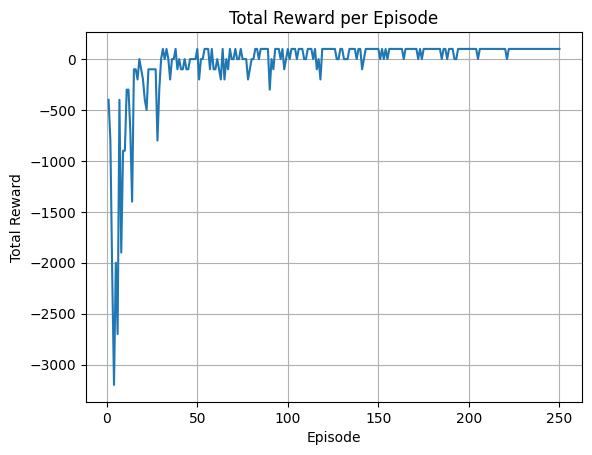

In [63]:
N = 6  
M = 5  
lake = makeLake(N, M)

env = FrozenLakeEnv(lake)
agent = QLearningAgent(N * N, 4)  
rewards_history = trainAgent(env, agent, episodes)
path = findPath(env, agent)

print("Frozen Lake:")
for row in lake:
    print(' '.join(row))

print("\nPath taken:")
print(path)
print("")

plt.plot(range(1, len(rewards_history) + 1), rewards_history)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.grid(True)
plt.show()

### With increase in episodes, total received reward increases rapidly in the beginning and reaches saturation 

## (c) Variation of learning performance with change in parameters(α and λ)

## i) Episode vs Reward: For different α

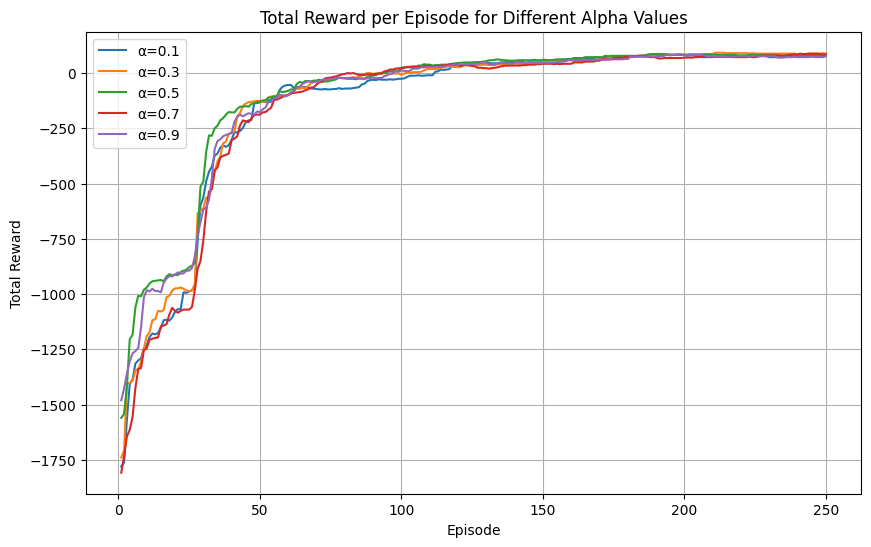

In [74]:
alpha_values = [0.1, 0.3, 0.5, 0.7, 0.9]
reward_dict = {alpha: [] for alpha in alpha_values}

for alpha in alpha_values:
    agent = QLearningAgent(state_size=N*N, action_size=4, alpha=alpha)
    rewards_history = trainAgent(env, agent, episodes)
    smoothed_rewards = smooth(rewards_history, 50)
    for episode in range(episodes):
        reward_dict[alpha].append(smoothed_rewards[episode])

plt.figure(figsize=(10, 6))

for alpha in alpha_values:
    plt.plot(range(1, episodes + 1), reward_dict[alpha], label=f'α={alpha}')

plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()


### In majority of cases, with increase in value of α (learning rate), the learning performance first improves more rapidly, but then decreases. With every execution, there is large variation in performance of graphs thus making conclusions less accurate.

## ii) Episode vs Reward: For different λ

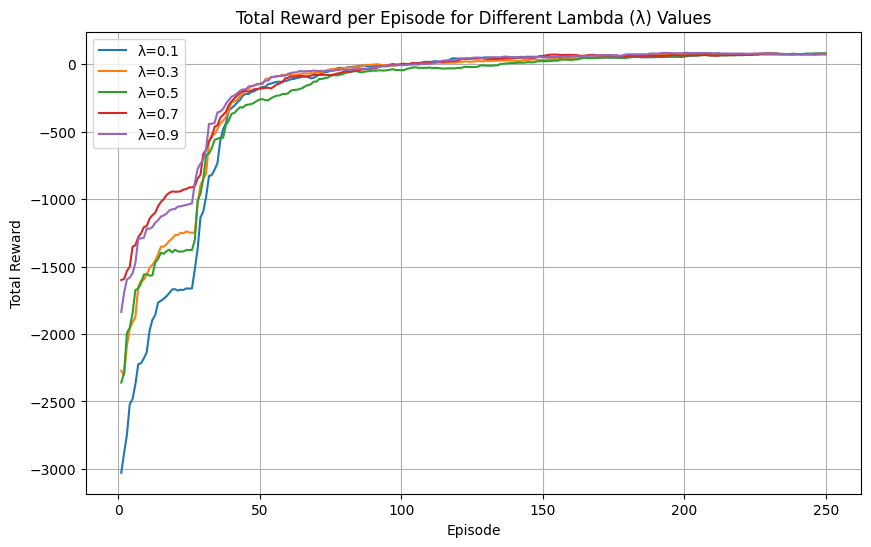

In [81]:
lambda_values = [0.1, 0.3, 0.5, 0.7, 0.9]
reward_dict = {lam: [] for lam in lambda_values}

for lam in lambda_values:
    agent = QLearningAgent(state_size=N*N, action_size=4, lamda=lam)
    rewards_history = trainAgent(env, agent, episodes)
    smoothed_rewards = smooth(rewards_history, 50)
    
    for episode in range(episodes):
        reward_dict[lam].append(smoothed_rewards[episode])

plt.figure(figsize=(10, 6))
for lam in lambda_values:
    plt.plot(range(1, episodes + 1), reward_dict[lam], label=f'λ={lam}')

plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Different Lambda (λ) Values')
plt.legend()
plt.grid(True)
plt.show()


### In majority of the cases observed, with increase in λ (time-discount) the learning performance first slows down and then increase as λ reaches closer to 1. Yet, with every execution there is variation in graphs making final conlusions doubtful.

## (d) Variation of learning performance with change in parameters(N and M)

## i) Episode vs Reward: For different N

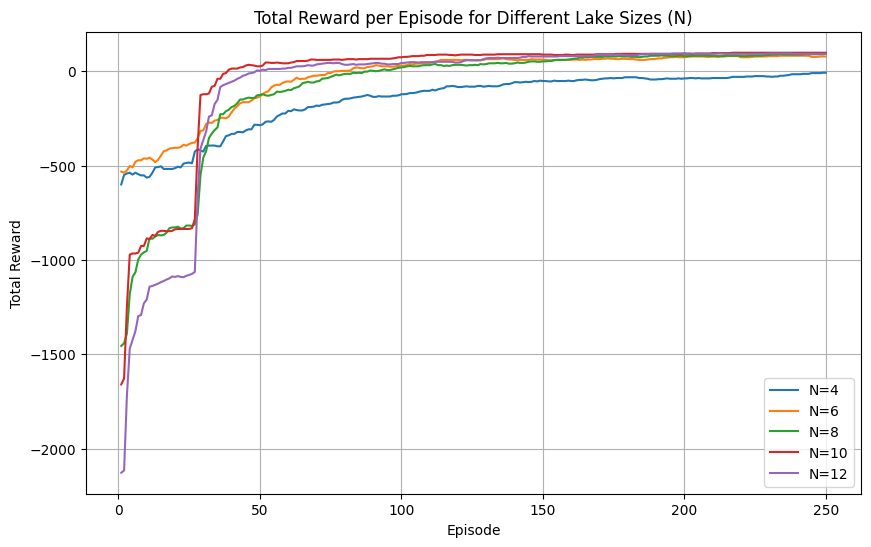

In [77]:
lake_sizes = [4, 6, 8, 10, 12]
reward_dict = {N: [] for N in lake_sizes}

for N in lake_sizes:
    M = 5  
    lake = makeLake(N, M)
    env = FrozenLakeEnv(lake)
    agent = QLearningAgent(state_size=N*N, action_size=4)
    rewards_history = trainAgent(env, agent, episodes)
    smoothed_rewards = smooth(rewards_history, 50)
    
    for episode in range(episodes):
        reward_dict[N].append(smoothed_rewards[episode])

plt.figure(figsize=(10, 6))

for N in lake_sizes:
    plt.plot(range(1, episodes + 1), reward_dict[N], label=f'N={N}')

plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Different Lake Sizes (N)')
plt.legend()
plt.grid(True)
plt.show()


### With increase in N (size of lake), learning performance of Q-learning agent increases

## ii) Episode vs Reward: For different M

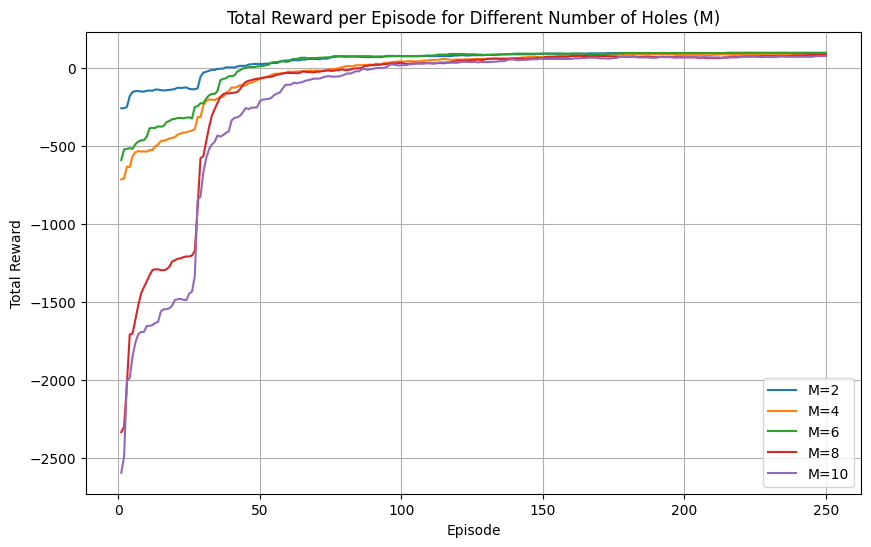

In [78]:
hole_counts = [2, 4, 6, 8, 10]
reward_dict = {M: [] for M in hole_counts}
N = 8 

for M in hole_counts:
    lake = makeLake(N, M)
    env = FrozenLakeEnv(lake)
    agent = QLearningAgent(state_size=N*N, action_size=4)
    rewards_history = trainAgent(env, agent, episodes)
    smoothed_rewards = smooth(rewards_history, 50)
    
    for episode in range(episodes):
        reward_dict[M].append(smoothed_rewards[episode])

plt.figure(figsize=(10, 6))

for M in hole_counts:
    plt.plot(range(1, episodes + 1), reward_dict[M], label=f'M={M}')

plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode for Different Number of Holes (M)')
plt.legend()
plt.grid(True)
plt.show()

### With increase in value of M (Number of Holes), learning performance decreases since it takes longer for the graph to reach optimal value

# Q3) Rulkov Map

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def rulkov_map(x, y, alpha, sigma, mu):
    if x <= 0:
        x_next = alpha / (1 - x) + y
    elif 0 < x < alpha + y:
        x_next = alpha + y
    else:
        x_next = -1
    y_next = y - mu * (x + 1) + mu * sigma
    return x_next, y_next

def simulate(x=-1, y=-1, sigma=-0.1, mu=0.001, alpha=4, n_iterations=2000):
    t = []
    for i in range(n_iterations):
        x, y = rulkov_map(x, y, alpha, sigma, mu)
        t.append(x)
    return t

def plot_timeseries(t, title):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(t)), t)
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('x')
    plt.show()

## a) Reproducing Model Behaviour

## i) Burst of Spikes

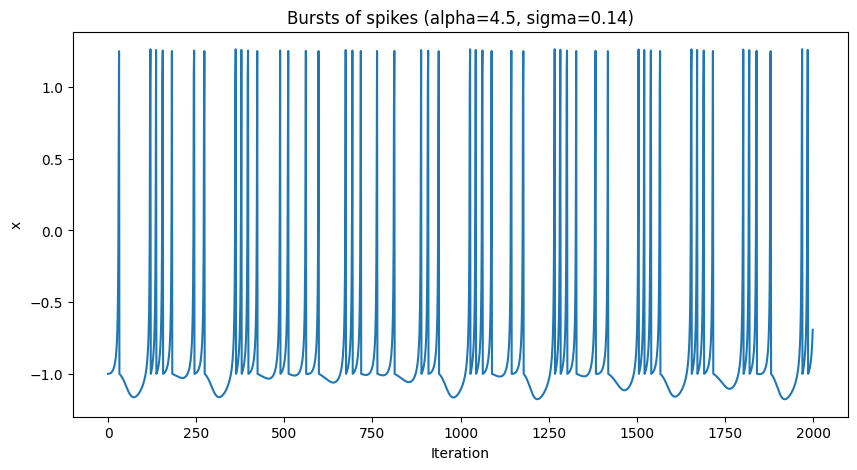

In [27]:
t_burst = simulate(x=-1,y=-3.25,alpha=4.5, sigma=0.14, mu=0.001)
plot_timeseries(t_burst, "Bursts of spikes (alpha=4.5, sigma=0.14)")

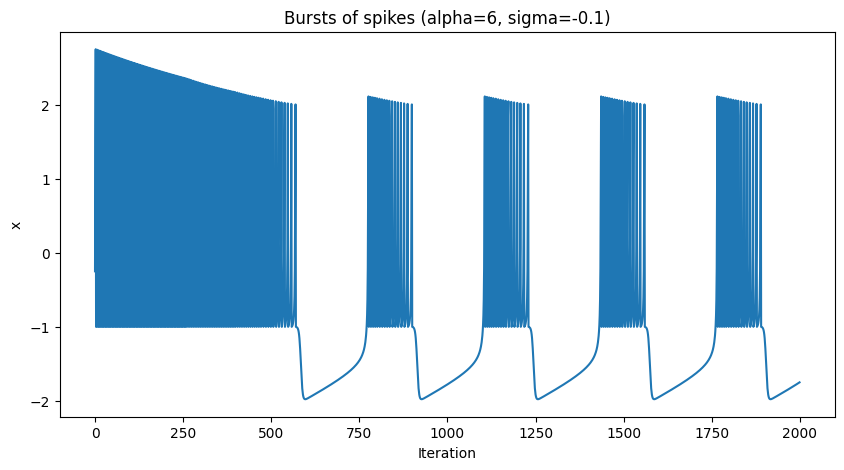

In [28]:
t_burst = simulate(x=-1,y=-3.25,alpha=6, sigma=-0.1, mu=0.001)
plot_timeseries(t_burst, "Bursts of spikes (alpha=6, sigma=-0.1)")

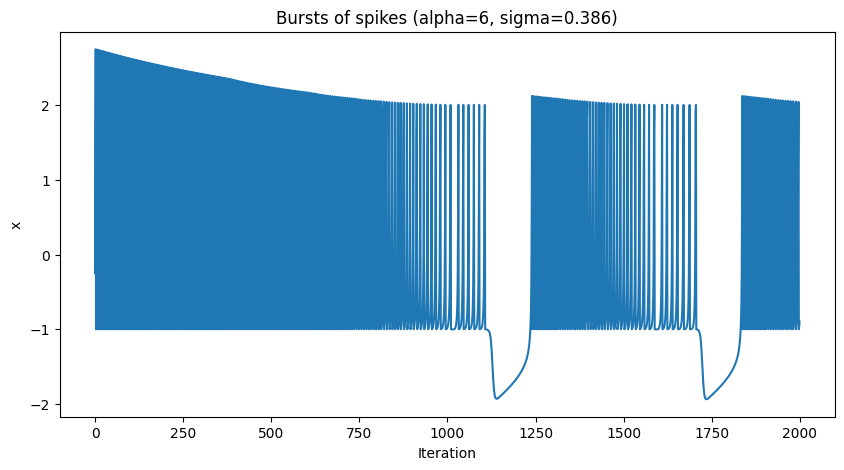

In [29]:
t_burst = simulate(x=-1,y=-3.25,alpha=6, sigma=0.386, mu=0.001)
plot_timeseries(t_burst, "Bursts of spikes (alpha=6, sigma=0.386)")

## ii) Tonic Spiking

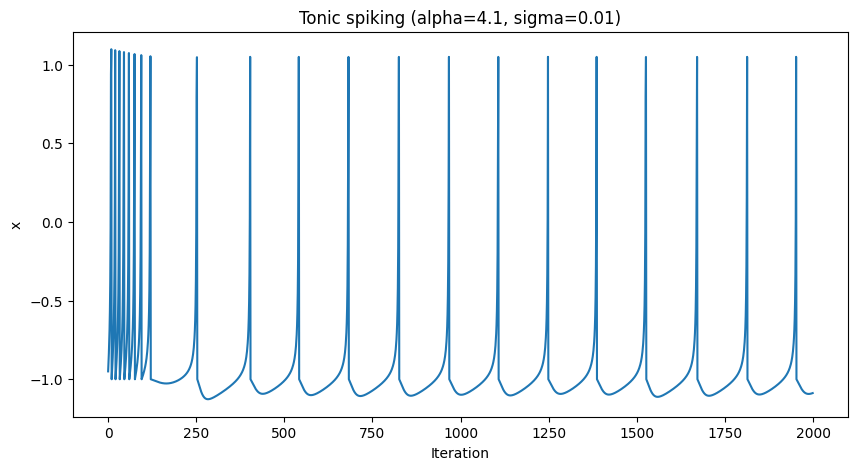

In [30]:
t_tonic = simulate(x=-1,y=-3,alpha=4.1, sigma=0.01, mu=0.001)
plot_timeseries(t_tonic, "Tonic spiking (alpha=4.1, sigma=0.01)")

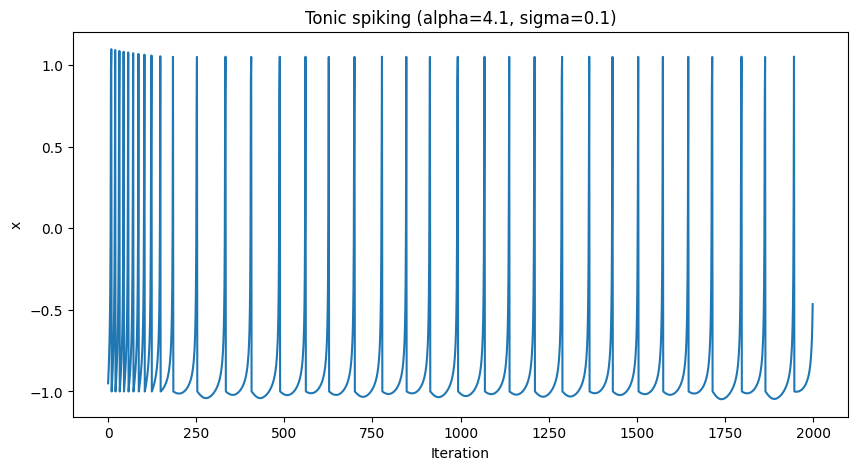

In [31]:
t_tonic = simulate(x=-1,y=-3,alpha=4.1, sigma=0.1, mu=0.001)
plot_timeseries(t_tonic, "Tonic spiking (alpha=4.1, sigma=0.1)")

## iii) Period of Silence

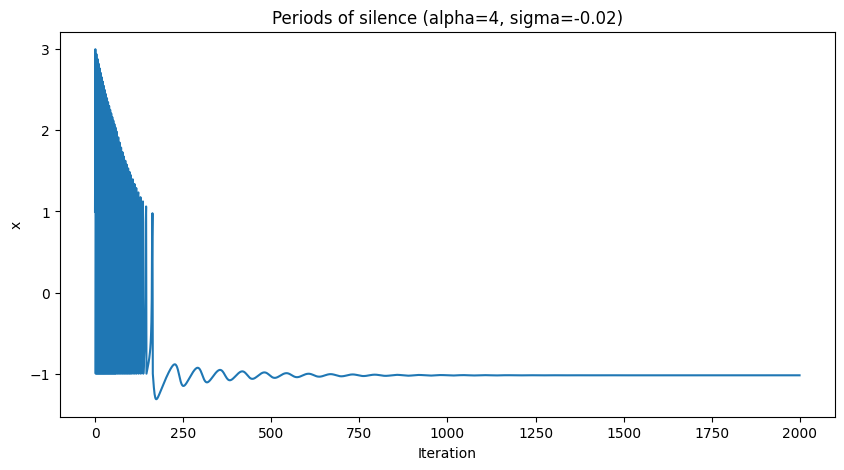

In [32]:
t_silence = simulate(x=-1,y=-1,alpha=4, sigma=-0.02, mu=0.01)
plot_timeseries(t_silence, "Periods of silence (alpha=4, sigma=-0.02)")

## b) Ranges of Parameter Values for different Regimes

In [33]:
def regime_classifier(t):
    t = t[1000:]
    if np.all(np.array(t) < 0):
        return "Silence"
    elif np.max(t) - np.min(t) < 1.0: 
        return "Tonic spiking"
    else:
        peaks = np.array([i for i in range(1, len(t)-1) if t[i-1] < t[i] and t[i] > t[i+1]])
        if len(peaks) > 0 and np.std(np.diff(peaks)) > 5:
            return "Bursting"
        else:
            return "Tonic spiking"
            
def explore_parameter_space(alpha_range, sigma_range, mu=0.01, n_iterations=5000):
    results = []
    for alpha in alpha_range:
        for sigma in sigma_range:
            t = simulate(alpha=alpha, sigma=sigma, mu=mu, n_iterations=n_iterations)
            regime = regime_classifier(t)
            results.append((alpha, sigma, regime))
    return results

def plot_parameter_space(results):
    alphas, sigmas, regimes = zip(*results)
    
    plt.figure(figsize=(12, 8))
    for regime in set(regimes):
        mask = np.array(regimes) == regime
        plt.scatter(np.array(alphas)[mask], np.array(sigmas)[mask], label=regime, alpha=0.6)
    
    plt.xlabel('Alpha')
    plt.ylabel('Sigma')
    plt.title('Rulkov Map Regimes in Parameter Space')
    plt.legend()
    plt.colorbar()
    plt.show()

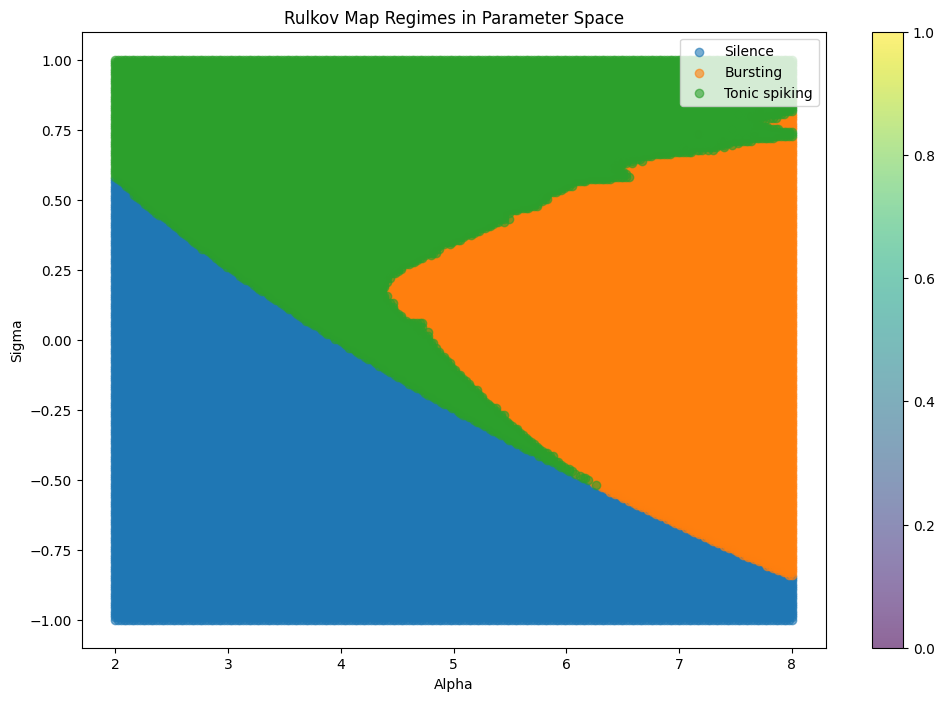

In [34]:
alpha_range = np.linspace(2, 8, 250)
sigma_range = np.linspace(-1, 1, 250)
results = explore_parameter_space(alpha_range, sigma_range)
plot_parameter_space(results)

In [35]:
regimes = {'Silence': [], 'Tonic spiking': [], 'Bursting': []}
for alpha, sigma, regime in results:
    regimes[regime].append((alpha, sigma))

for regime, values in regimes.items():
    if values:
        alpha_min, alpha_max = min(v[0] for v in values), max(v[0] for v in values)
        sigma_min, sigma_max = min(v[1] for v in values), max(v[1] for v in values)
        print(f"{regime}:")
        print(f"  Alpha range: {alpha_min:.2f} to {alpha_max:.2f}")
        print(f"  Sigma range: {sigma_min:.2f} to {sigma_max:.2f}")
    else:
        print(f"{regime}: No occurrences found in the explored parameter space")

Silence:
  Alpha range: 2.00 to 8.00
  Sigma range: -1.00 to 0.57
Tonic spiking:
  Alpha range: 2.00 to 8.00
  Sigma range: -0.52 to 1.00
Bursting:
  Alpha range: 4.39 to 8.00
  Sigma range: -0.84 to 0.88
